In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prepare_yerevan_data import prepare_yerevan_data
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
# In this file we're training a model to predict the pm2.5 level only
air_data = prepare_yerevan_data()
air_data = air_data.drop(columns=['pm10', 'nitrogen_dioxide'])

In [3]:
corr_matrix = air_data.corr()
print(corr_matrix["pm2_5_delta"].sort_values(ascending=False))

pm2_5_delta             1.000000
is_busy                 0.283730
hour                    0.128234
pm2_5                   0.100643
surface_pressure        0.032125
temperature_2m          0.017709
wind_speed_10m          0.008224
time                   -0.000037
precipitation          -0.010744
relative_humidity_2m   -0.012272
stagnation             -0.013111
is_weekday             -0.015043
is_raining             -0.022762
hour_sin               -0.087427
pm2_5_lag_1h           -0.100660
hour_cos               -0.154991
Name: pm2_5_delta, dtype: float64


In [4]:
# Spltting into training and testing

X = air_data.drop(columns=['pm2_5_delta', 'time', 'pm2_5'])
y = air_data['pm2_5_delta']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False)


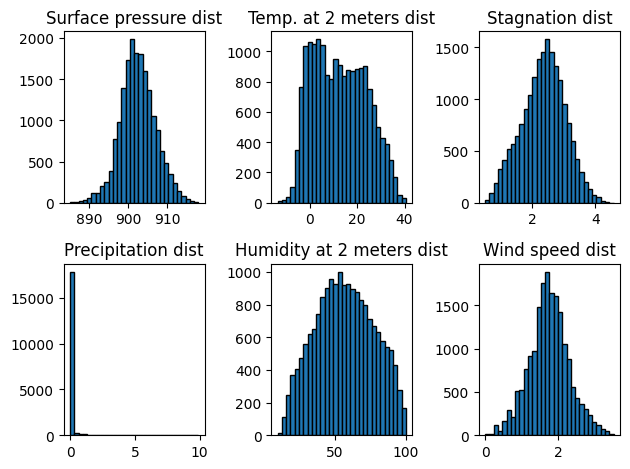

In [5]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(air_data['surface_pressure'], bins=30, edgecolor='k')
axs[0, 0].set_title("Surface pressure dist")
axs[0, 1].hist(air_data['temperature_2m'], bins=30, edgecolor='k')
axs[0, 1].set_title("Temp. at 2 meters dist")
axs[0, 2].hist(air_data['stagnation'], bins=30, edgecolor='k')
axs[0, 2].set_title("Stagnation dist")
axs[1, 0].hist(air_data['precipitation'], bins=30, edgecolor='k')
axs[1, 0].set_title("Precipitation dist")
axs[1, 1].hist(air_data['relative_humidity_2m'], bins=30, edgecolor='k')
axs[1, 1].set_title("Humidity at 2 meters dist")
axs[1, 2].hist(air_data['wind_speed_10m'], bins=30, edgecolor='k')
axs[1, 2].set_title("Wind speed dist")

plt.tight_layout()
plt.show()

In [14]:
air_data['is_raining'].value_counts()

is_raining
0    16960
1     1615
Name: count, dtype: int64

In [20]:
# std_scaler = StandardScaler()
# X_train_scaled = std_scaler.fit_transform(X_train)
# X_test_scaled = std_scaler.transform(X_test)

In [6]:
# Selecting a model and fitting (hyperparams are tuned by performing grid search)
# TODO: Scale the data maybe?
model = XGBRegressor(
    random_state=42,
    gamma=0.1,
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=5,
)

In [22]:
# param_grid = {
#     "n_estimators" : [1000, 1250, 1500],
#     "max_depth" : [3, 5, 7],
#     "gamma" : [0.05, 0.1, 0.15, 0.2],
#     "learning_rate" : [0.01, 0.02, 0.03]
# }

In [23]:
# tscv = TimeSeriesSplit(n_splits=3)

In [24]:
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     verbose=4,
#     cv=tscv,
#     scoring="neg_root_mean_squared_error",
#     refit=True
# )

In [25]:
# grid_search.fit(X_train, y_train)

In [26]:
# grid_search.best_score_

In [7]:
# Fit the model
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
# Predicting
y_pred = model.predict(X_test)

In [10]:
# Evaluating
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")


MAE: 0.768
RMSE: 1.140
R^2: 0.369


In [11]:
# Feature importances for our model
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                 Feature  Importance
7                is_busy    0.634478
10              hour_cos    0.076620
0         temperature_2m    0.069130
9               hour_sin    0.056720
8           pm2_5_lag_1h    0.048792
5                   hour    0.027397
4       surface_pressure    0.017998
1         wind_speed_10m    0.016498
11            stagnation    0.016100
2   relative_humidity_2m    0.015609
6             is_weekday    0.011544
3          precipitation    0.009115
12            is_raining    0.000000
